## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.05, 0.25, 0.5, 0.75, 0.95]

In [8]:
results = {}

for MM in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MM = %.6f" % (MM))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MM-%s" % str(MM)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0811 21:17:33.627815 11708 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 21:17:33.636814 11708 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 21:17:33.796814 11708 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.050000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0811 21:17:34.282814 11708 deprecation.py:323] From C:\Users\Francis\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.2725 - acc: 0.1450 - val_loss: 2.2250 - val_acc: 0.1958
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1901 - acc: 0.2142 - val_loss: 2.1609 - val_acc: 0.2358
Epoch 3/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.1322 - acc: 0.2495 - val_loss: 2.1089 - val_acc: 0.2652
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.0835 - acc: 0.2703 - val_loss: 2.0649 - val_acc: 0.2831
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.0429 - acc: 0.2875 - val_loss: 2.0280 - val_acc: 0.2965
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.0096 - acc: 0.3007 - val_loss: 1.9976 - val_acc: 0.3013
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.9816 - acc: 0.3098 - val_loss: 1.9722 - 

Epoch 2/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.1522 - acc: 0.2319 - val_loss: 2.1122 - val_acc: 0.2579
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.0850 - acc: 0.2645 - val_loss: 2.0553 - val_acc: 0.2769
Epoch 4/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.0357 - acc: 0.2827 - val_loss: 2.0116 - val_acc: 0.2953
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.9972 - acc: 0.3010 - val_loss: 1.9778 - val_acc: 0.3016
Epoch 6/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.9664 - acc: 0.3123 - val_loss: 1.9502 - val_acc: 0.3238
Epoch 7/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.9410 - acc: 0.3236 - val_loss: 1.9270 - val_acc: 0.3257
Epoch 8/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.9193 - acc: 0.3327 - val_loss: 1.9073 - val_acc: 0.3358
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 9s 183us/step - loss: 2.0437 - acc: 0.2834 - val_loss: 2.0115 - val_acc: 0.2997
Epoch 4/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.9911 - acc: 0.3032 - val_loss: 1.9671 - val_acc: 0.3103
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.9505 - acc: 0.3186 - val_loss: 1.9333 - val_acc: 0.3314
Epoch 6/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9174 - acc: 0.3316 - val_loss: 1.9034 - val_acc: 0.3436
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.8906 - acc: 0.3416 - val_loss: 1.8796 - val_acc: 0.3433
Epoch 8/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.8681 - acc: 0.3500 - val_loss: 1.8614 - val_acc: 0.3481
Epoch 9/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.8490 - acc: 0.3568 - val_loss: 1.8411 - val_acc: 0.3561
Epoch 10/50
50000/50000 [==================

50000/50000 [==============================] - 9s 185us/step - loss: 1.8819 - acc: 0.3372 - val_loss: 1.8644 - val_acc: 0.3449
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.8456 - acc: 0.3505 - val_loss: 1.8374 - val_acc: 0.3515
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.8172 - acc: 0.3619 - val_loss: 1.8102 - val_acc: 0.3639
Epoch 7/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7924 - acc: 0.3723 - val_loss: 1.7858 - val_acc: 0.3763
Epoch 8/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.7712 - acc: 0.3799 - val_loss: 1.7647 - val_acc: 0.3817
Epoch 9/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.7518 - acc: 0.3871 - val_loss: 1.7459 - val_acc: 0.3895
Epoch 10/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.7353 - acc: 0.3926 - val_loss: 1.7293 - val_acc: 0.3949
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 9s 183us/step - loss: 1.6145 - acc: 0.4339 - val_loss: 1.6024 - val_acc: 0.4398
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5766 - acc: 0.4484 - val_loss: 1.5662 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5421 - acc: 0.4604 - val_loss: 1.5614 - val_acc: 0.4513
Epoch 8/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5126 - acc: 0.4698 - val_loss: 1.5217 - val_acc: 0.4643
Epoch 9/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.4844 - acc: 0.4790 - val_loss: 1.5096 - val_acc: 0.4652
Epoch 10/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4590 - acc: 0.4871 - val_loss: 1.4821 - val_acc: 0.4746
Epoch 11/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.4350 - acc: 0.4960 - val_loss: 1.4688 - val_acc: 0.4835
Epoch 12/50
50000/50000 [==================

In [9]:
results_2 = {}

for MM in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MM = %.6f" % (MM))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=MM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-MM-%s" % str(MM)
    results_2[exp_name_tag] = {'train-loss': train_loss,
                               'valid-loss': valid_loss,
                               'train-acc': train_acc,
                               'valid-acc': valid_acc}

Experiment with MM = 0.050000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.2633 - acc: 0.1519 - val_loss: 2.2064 - val_acc: 0.1874
Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.1661 - acc: 0.2258 - val_loss: 2.1316 - val_acc: 0.2494
Epoch 3/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0994 - acc: 0.2665 - val_loss: 2.0738 - val_acc: 0.2767
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.0486 - acc: 0.2864 - val_loss: 2.0286 - val_acc: 0.2932
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.0078 - acc: 0.3015 - val_loss: 1.9915 - val_acc: 0.3039
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.9740 - acc: 0.3128 - val_loss: 1.9602 - val_acc: 0.3186
Epoch 7/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.9467 - acc: 0.3216 - val_loss: 1.9356 - 

50000/50000 [==============================] - 9s 183us/step - loss: 2.1872 - acc: 0.2105 - val_loss: 2.1102 - val_acc: 0.2537
Epoch 2/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.0661 - acc: 0.2736 - val_loss: 2.0285 - val_acc: 0.2816
Epoch 3/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.9994 - acc: 0.2985 - val_loss: 1.9735 - val_acc: 0.3044
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.9513 - acc: 0.3166 - val_loss: 1.9325 - val_acc: 0.3207
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.9149 - acc: 0.3307 - val_loss: 1.9013 - val_acc: 0.3365
Epoch 6/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.8861 - acc: 0.3395 - val_loss: 1.8767 - val_acc: 0.3418
Epoch 7/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8633 - acc: 0.3474 - val_loss: 1.8552 - val_acc: 0.3527
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 176us/step - loss: 2.0087 - acc: 0.2927 - val_loss: 1.9571 - val_acc: 0.3166
Epoch 3/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.9275 - acc: 0.3229 - val_loss: 1.8976 - val_acc: 0.3397
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.8771 - acc: 0.3409 - val_loss: 1.8559 - val_acc: 0.3504
Epoch 5/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.8416 - acc: 0.3532 - val_loss: 1.8260 - val_acc: 0.3610
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8134 - acc: 0.3623 - val_loss: 1.8006 - val_acc: 0.3711
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7902 - acc: 0.3693 - val_loss: 1.7746 - val_acc: 0.3781
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7688 - acc: 0.3778 - val_loss: 1.7573 - val_acc: 0.3834
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 175us/step - loss: 1.7295 - acc: 0.3919 - val_loss: 1.7082 - val_acc: 0.4004
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.6716 - acc: 0.4140 - val_loss: 1.6463 - val_acc: 0.4215
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6288 - acc: 0.4266 - val_loss: 1.6225 - val_acc: 0.4287
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.5913 - acc: 0.4406 - val_loss: 1.5933 - val_acc: 0.4349
Epoch 7/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5649 - acc: 0.4491 - val_loss: 1.5540 - val_acc: 0.4514
Epoch 8/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.5287 - acc: 0.4620 - val_loss: 1.5290 - val_acc: 0.4604
Epoch 9/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5050 - acc: 0.4709 - val_loss: 1.5128 - val_acc: 0.4695
Epoch 10/50
50000/50000 [====================

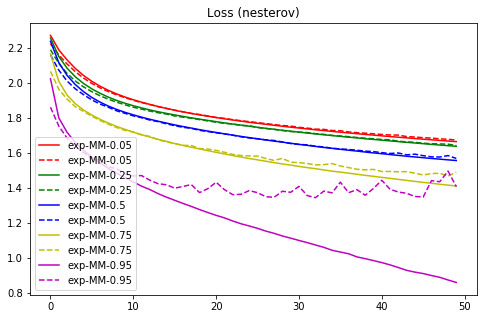

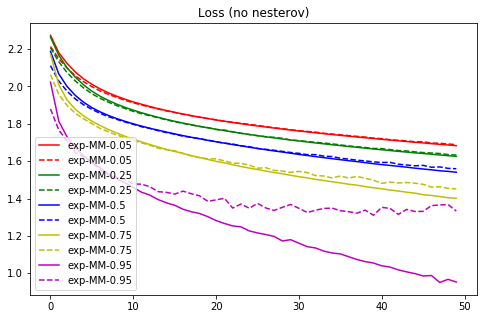

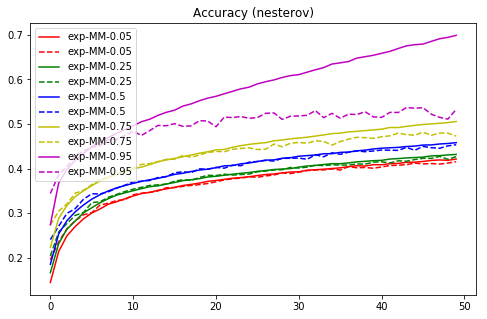

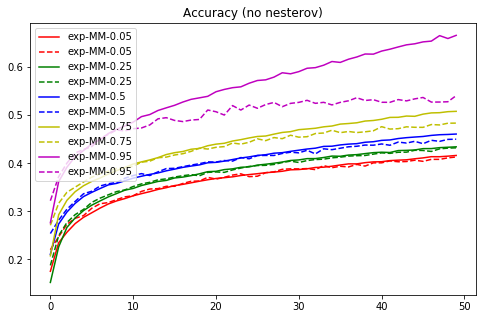

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (nesterov)")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train-loss'])),results_2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid-loss'])),results_2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (no nesterov)")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (nesterov)")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train-acc'])),results_2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid-acc'])),results_2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (no nesterov)")
plt.legend()
plt.show()

從結果看起來，使用 Nesterov 與較高的 Momenturn 較好